## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

3. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

4. **Five points are properly formatting the assignment**. The breakdown is as follows:
    - Must be an HTML file rendered using Quarto **(1 point)**. *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file.* 
    - No name can be written on the assignment, nor can there be any indicator of the student’s identity—e.g. printouts of the working directory should not be included in the final submission.  **(1 point)**
    - There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) **(1 point)**
    - Final answers to each question are written in the Markdown cells. **(1 point)**
    - There is no piece of unnecessary / redundant code, and no unnecessary / redundant text. **(1 point)**

## Data description {-}
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls, where bank clients were called to subscribe for a term deposit. 

There is one train data - *train.csv*, which you will use to develop a model. There are two test datasets - *test1.csv* and *test2.csv*, which you will use to test your model. Each observation is a phone call and each column is a variable about the client or the phone call. Each dataset has the following attributes about the clients called in the marketing campaign:

1. `age`: Age of the client

2. `education`: Education level of the client 

3. `day`: Day of the month the call is made

4. `month`: Month of the call 

5. `y`: did the client subscribe to a term deposit? 

6. `duration`: Call duration, in seconds. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the `duration` is not known before a call is performed. Also, after the end of the call `y` is obviously known. Thus, this input should only be included for inference purposes and should be discarded if the intention is to have a realistic predictive model.

(Source: [UCI Data Archive](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Please use the given datasets for the assignment, not the raw data from the source. It is just for reference.)

## Instructions / suggestions for answering questions{-} 

(1) **Instruction:** Use *train.csv* for all questions, unless otherwise stated.

(2) **Suggestion 1:** You may use the functions in the class notes for printing the confusion matrix and the overall classification accuracy based on test / train data. 

(3) **Suggestion 2:**: If you make variable transformations, you will need to do it for all the three datasets. Your code will be a bit concise if you make a function containing all the transformations, and then call it for the training and the two test datasets. You can put this function in the beginning of the code and keep adding transformations to it as you proceed with the assignment. You may need transformations in questions (1) and (13).

## 1)

Read the datasets. Make an appropriate visualization to visualize how the proportion of clients subscribing to a term deposit change with increasing call duration.

*(4 points)*

**Hints**: 

1.  Bin `duration` to create `duration_binned`. Group the data to find the fraction of clients responding positively to the marketing campaign for each bin in `duration_binned`. Make a lineplot of percentage of clients subscribing to a term deposit vs `duration_binned`, where the bins in `duration_binned` are arranged in increasing order of duration. 

2. You may choose an appropriate number of bins & type of binning that helps you visualize well. 

3. You may also think of other ways of visualization. You don't need to stick with this one.

/var/folders/j3/xhg265bj3gg399v4cr257t6w0000gn/T/ipykernel_52080/227020042.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = train.groupby("duration_binned")["y_numeric"].mean()


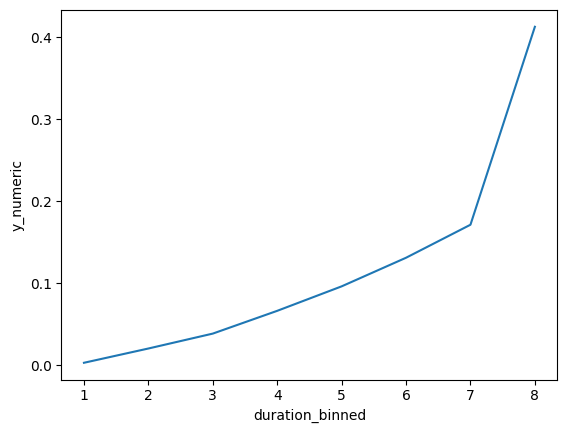

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


train = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/train.csv")
test1 = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/test1.csv")
test2 = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/test2.csv")

train["duration_binned"] = pd.qcut(train.duration, 8, labels=[1, 2, 3, 4, 5, 6, 7, 8])
train['y_numeric'] = train['y'].map({'yes': 1, 'no': 0})
bin_means = train.groupby("duration_binned")["y_numeric"].mean()
bin_means.plot(kind="line")
plt.xlabel("duration_binned")
plt.ylabel("y_numeric")
plt.show()


## 2) Predictor `duration`
Based on the plot in (1), comment whether `duration` seems to be a useful variable to predict if the client will subscribe to a term deposit.

*(1 point)*

Duration seems to be a useful variable to predict if a client will subscribe to a term deposit as there seems to be a general positive relationship between duration and probability of subscribing to a term deposit. Additionally, there is a big jump in the probability of subscribing to a term deposit in the last bin.

## 3) Model based on `duration`
Develop a logistic regression model to predict if the client subscribed to a term deposit based on call `duration`. Use the model to make a lineplot showing the probability of the client subscribing to a term deposit based on call `duration`.

*(3 points)*

In [2]:
model = smf.logit(formula = "y_numeric ~ duration", data = train).fit()

Optimization terminated successfully.
         Current function value: 0.305028
         Iterations 7


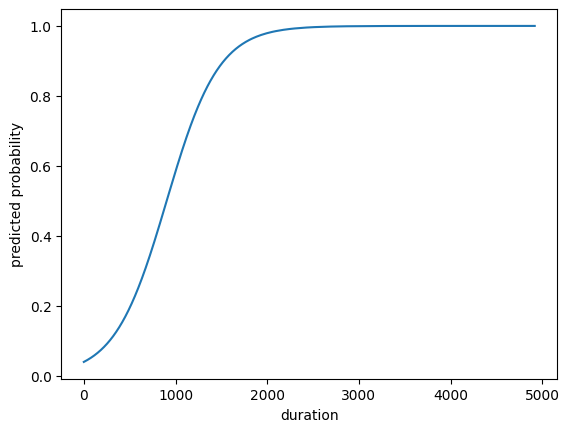

In [3]:
train.sort_values("duration", inplace=True)
predicted_probs = model.predict(train)
plt.plot(train.duration, predicted_probs)
plt.xlabel("duration")
plt.ylabel("predicted probability")
plt.show()

## Note {-} 
Answer questions 4 to 11 based on the regression model developed in (3).

## 4) Model significance
Is the regression model in statistically significant? Justify your answer.

*(1 point for code, 1 point for answer)*

In [4]:
model.pvalues

Intercept    0.0
duration     0.0
dtype: float64

The model is statistically significant as all the p-values are less than 0.05.

## 5) Subscription probability in 5 minutes
What is the probability that the client subscribes to a term deposit with a 5-minute marketing call? Note that the call `duration` in data is given in *seconds*.

*(2 points)*

In [5]:
b0 = model.params.iloc[0]
b1 = model.params.iloc[1]

x = 5*60

z = b0 + b1*x
p = 1/(1+np.exp(-z))
print(round(p*100, 2))

10.65


## 6) Call duration for subscription
What is the minimum call duration (in minutes) for which a client has a 95% or higher chance of subscribing to a term deposit?

*(3 points)*

\begin{aligned}
    p(X) &= \frac{e^{b_0 + b_1 X}}{1 + e^{b_0 + b_1 X}} \\
    0.95 &= \frac{e^{b_0 + b_1 X}}{1 + e^{b_0 + b_1 X}} \\
    0.95(1 + e^{b_0 + b_1 X}) &= e^{b_0 + b_1 X} \\
    0.95 + 0.95 e^{b_0 + b_1 X} &= e^{b_0 + b_1 X} \\
    0.95 &= 0.05 e^{b_0 + b_1 X} \\
    e^{b_0 + b_1 X} &= \frac{0.95}{0.05} = 19 \\
    b_0 + b_1 X &= \log(19) \\
    X &= \frac{\log(19) - b_0}{b_1}
    \end{aligned}
    

In [6]:
float(((np.log(19) - b0)/b1)/60)


28.989940038597865

## 7) Maximum call duration
What is the maximum call duration (in minutes) in which a client refused to subscribe to a term deposit? What was the probability of the client subscribing to the term deposit in that call?

*(3 points)*

In [7]:
max_dur = float((train[train.y_numeric == 0].duration.max())/60)
print(max_dur)

81.96666666666667


In [8]:
float(np.exp(b0 + b1 * (max_dur * 60)) / (1 + np.exp(b0 + b1 * (max_dur * 60))))

0.9999992798803662

## 8) Percent increase in odds
What is the percentage increase in the odds of a client subscribing to a term deposit when the call `duration` increases by a minute?

*(3 points)*

In [9]:
odds_ratio = np.exp(60*b1)
perc_inc = 100*(odds_ratio - 1)
print(perc_inc)

23.540942175386558


## 9) Doubling the subscription odds
How much must the call `duration` increase (in minutes) so that it doubles the odds of the client subscribing to a term deposit.

*(3 points)*

$$
\text{perc\_inc} = 100\%
$$

$$
\text{odds\_ratio} - 1 = 1
$$

$$
\text{odds\_ratio} = 2
$$

$$
e^{\text{increase} \cdot b_1} = 2
$$

$$
\text{increase} \cdot b_1 = \log(2)
$$

$$
\text{increase} = \frac{\log(2)}{b_1}
$$

$$
\text{increase\_min} = \frac{\text{increase}}{60}
$$


In [10]:
increase_sec = np.log(2)/b1
increase_min = increase_sec/60
print(increase_min)

3.2788042131930957


## 10) Classification accuracy
What is minimum overall classification accuracy of the model among the classification accuracies on *train.csv*, *test1.csv* and *test2.csv*? Consider a threshold of 30% when classifying observations.

*(2 + 1 + 1 points)*

In [11]:
test1["y_numeric"] = test1["y"].map({"yes": 1, "no": 0})
test2["y_numeric"] = test2["y"].map({"yes": 1, "no": 0})

pred_labels_train = (predicted_probs > 0.3).astype(int)

pred_test1 = model.predict(test1)
pred_test1_labels = (pred_test1 > 0.3).astype(int)

pred_test2 = model.predict(test2)
pred_test2_labels = (pred_test2 > 0.3).astype(int)

accuracy_train = accuracy_score(train.y_numeric, pred_labels_train)
accuracy_test1 = accuracy_score(test1.y_numeric, pred_test1_labels)
accuracy_test2 = accuracy_score(test2.y_numeric, pred_test2_labels)

print(min(accuracy_train, accuracy_test1, accuracy_test2))

0.8841176470588236


## 11) Recall
What is the minimum *Recall* of the model among the *Recall* performance on *train.csv*, *test1.csv* and *test2.csv*? Consider a decision threshold probability of 30% when classifying observations. 

Here, *Recall* is the proportion of clients predicted to subscribe to a term deposit among those who actually subscribed.

*(3 points)*

In [12]:
recall_train = recall_score(train.y_numeric, pred_labels_train)
recall_test1 = recall_score(test1.y_numeric, pred_test1_labels)
recall_test2 = recall_score(test2.y_numeric, pred_test2_labels)

print(min(recall_train, recall_test1, recall_test2))

0.29434697855750486


## 12) Subscription probability based on `age` and `education`
Develop a logistic regression model to predict the probability of a client subscribing to a term deposit based on `age`, `education` and the two-factor interaction between `age` and `education`. Based on the model, answer:

a. People with which type of `education` *(primary / secondary / tertiary / unknown)* have the highest percentage increase in odds of subscribing to a term deposit with a unit increase in `age`? Justify your answer. 

b. What is the percentage increase in odds of a person subscribing to a term deposit for a unit increase in `age`, if the person has *tertiary* `education`. 

c. What is the percentage increase in odds of a person subscribing to a term deposit for a unit increase in `age`, if the person has *primary* `education`.

*(1 point for developing the model, 3 points for (a), 3 points for (b), 3 points for (c))*

In [13]:
model_2 = smf.logit(formula = "y_numeric ~ age + C(education) + age*C(education)", data = train).fit()

Optimization terminated successfully.
         Current function value: 0.356771
         Iterations 7


In [14]:
age_primary = model_2.params.iloc[4]
age_secondary = age_primary + model_2.params.iloc[5]
age_tertiary = age_primary + model_2.params.iloc[6]
age_unknown = age_primary + model_2.params.iloc[7]

print("age_primary:", age_primary, "age_secondary:", age_secondary, "age_tertiary:", age_tertiary, "age_unknown:", age_unknown)

age_primary: 0.046154741003059094 age_secondary: 0.009017244379055343 age_tertiary: 0.001481328117753096 age_unknown: 0.001828636833250158


a. People with primary education have the highest percentage increase in odds of subscribing to a term deposit with a unit increase in age because holding age constant, having a secondary, tertiary, or unknown education decreases the odds of subscribing to a term deposit.

In [15]:
perc_inc = 100*(np.exp(age_tertiary) - 1)
print(perc_inc)

0.1482425826204503


b. The percentage increase due to a unit increase in age for a person with tertiary education is 0.148%.

In [16]:
perc_inc_primary = 100*(np.exp(age_primary) - 1)
print(perc_inc_primary)

4.723644883819489


c. The percentage increase due to a unit increase in age for a person with primary education is 4.72%.

## 13) Model development
Develop a logistic regression model *(using train.csv)* to predict the probability of a client subscribing to a term deposit based on `age`, `education`, `day` and `month`. The model must have: 

a.  Minimum overall classification accuracy of 75% among the classification accuracies on *train.csv*, *test1.csv* and *test2.csv*. 

b. Minimum recall of 50% among the recall performance on *train.csv*, *test1.csv* and *test2.csv*. 

For all the three datasets - *train.csv*, *test1.csv* and *test2.csv*, print the: 

1. Model summary (only for *train.csv*), 

2. Confusion matrices,

3. Overall classification accuracies, and

4. Recall



Note that: 

1. You cannot use `duration` as a predictor because its value is determined after the marketing call ends. However, after the call ends, we already know whether the client responded positively or negatively. That is why we have used `duration` only for inference in the previous questions. It helped us understand the effect of the length of the call on marketing success. 

2. It is possible to develop the model satisfying constrains (a) and (b) with just appropriate transformation(s) of the predictor(s). However, you may consider interactions if you wish. Justify the transformations, if any, with visualizations.

3. You are free to choose any value of the decision threshold probability for classifying observations. However, you must use the same threshold on all the three datasets.

*(10 points)*

<Axes: xlabel='y_numeric'>

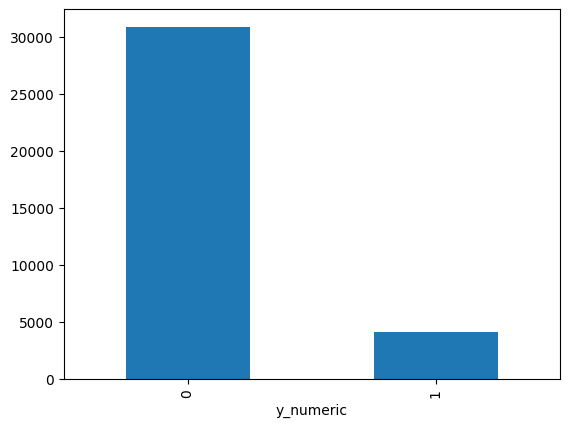

In [17]:
train["y_numeric"].value_counts().plot(kind="bar")

<Axes: >

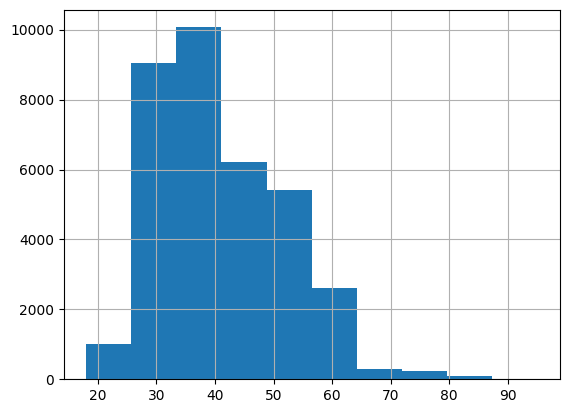

In [18]:
# age histogram
train["age"].hist()

<Axes: >

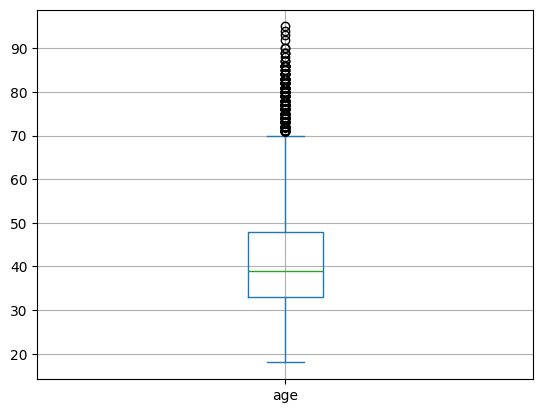

In [19]:
# age boxplot
train["age"].plot(kind="box", grid=True)


<Axes: >

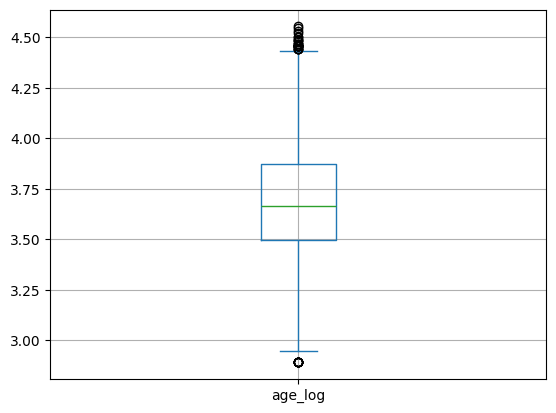

In [20]:
train["age_log"] = np.log(train["age"])
test1["age_log"] = np.log(test1["age"])
test2["age_log"] = np.log(test2["age"])

# plot age_log box plot
train["age_log"].plot(kind="box", grid=True)

<Axes: >

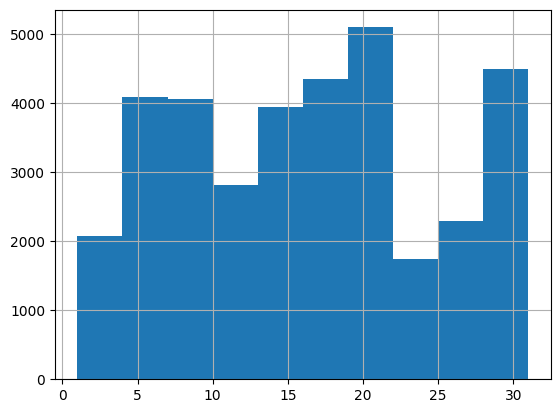

In [21]:
# day histogram
train["day"].hist()

<Axes: >

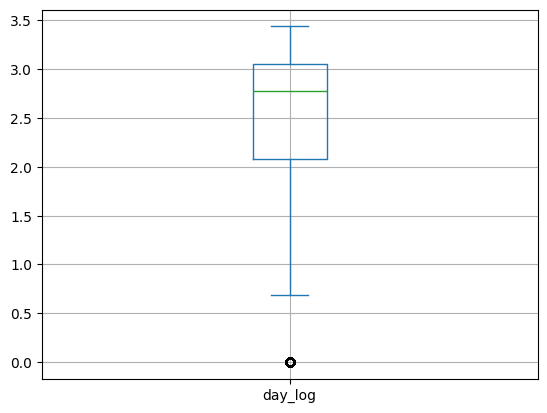

In [22]:
train["day_log"] = np.log(train["day"])
test1["day_log"] = np.log(test1["day"])
test2["day_log"] = np.log(test2["day"])

# plot day_log box plot
train["day_log"].plot(kind="box", grid=True)

<Axes: xlabel='day'>

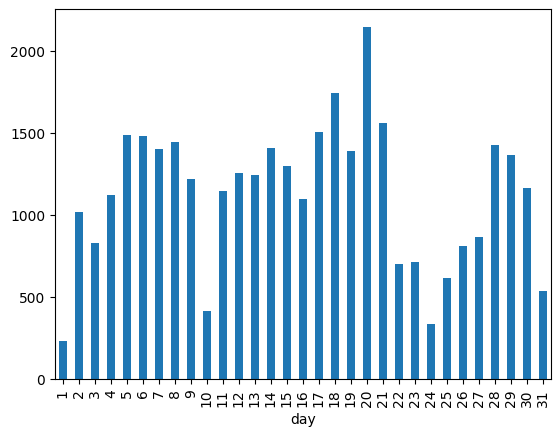

In [23]:
# plot month vs day
train.groupby("day")["month"].count().plot(kind="bar")


In [24]:
# bin age
train["age_bin"] = pd.cut(train["age"], bins=[18, 30, 40, 50, 65, 100], labels=[0, 1, 2, 3, 4])
test1["age_bin"] = pd.cut(test1["age"], bins=[18, 30, 40, 50, 65, 100], labels=[0, 1, 2, 3, 4])
test2["age_bin"] = pd.cut(test2["age"], bins=[18, 30, 40, 50, 65, 100], labels=[0, 1, 2, 3, 4])
train["age_bin"].fillna(train["age_bin"].mode()[0], inplace=True)

# bin day
train["day_bin"] = pd.cut(train["day"], bins=[1, 10, 20, 31], labels=[0, 1, 2])
test1["day_bin"] = pd.cut(test1["day"], bins=[1, 10, 20, 31], labels=[0, 1, 2])
test2["day_bin"] = pd.cut(test2["day"], bins=[1, 10, 20, 31], labels=[0, 1, 2])
train["day_bin"].fillna(train["day_bin"].mode()[0], inplace=True)



model_3 = smf.logit(
    formula="y_numeric ~ age_log + day_log +  C(month)*C(day_bin) + C(age_bin)*C(education)",
    data=train).fit()


print(model_3.summary())




/var/folders/j3/xhg265bj3gg399v4cr257t6w0000gn/T/ipykernel_52080/1188742802.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["age_bin"].fillna(train["age_bin"].mode()[0], inplace=True)
/var/folders/j3/xhg265bj3gg399v4cr257t6w0000gn/T/ipykernel_52080/1188742802.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

Optimization terminated successfully.
         Current function value: 0.320076
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              y_numeric   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34943
Method:                           MLE   Df Model:                           56
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                  0.1144
Time:                        00:02:19   Log-Likelihood:                -11203.
converged:                       True   LL-Null:                       -12650.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -

In [25]:
train_probs = model_3.predict(train)
test1_probs = model_3.predict(test1)
test2_probs = model_3.predict(test2)

threshold = 0.12  
pred_labels_train = (train_probs > threshold).astype(int)
pred_labels_test1 = (test1_probs > threshold).astype(int)
pred_labels_test2 = (test2_probs > threshold).astype(int)

accuracy_train = accuracy_score(train.y_numeric, pred_labels_train)
accuracy_test1 = accuracy_score(test1.y_numeric, pred_labels_test1)
accuracy_test2 = accuracy_score(test2.y_numeric, pred_labels_test2)

recall_train = recall_score(train.y_numeric, pred_labels_train)
recall_test1 = recall_score(test1.y_numeric, pred_labels_test1)
recall_test2 = recall_score(test2.y_numeric, pred_labels_test2)

# Print results
print("Recall:", recall_train, recall_test1, recall_test2)
print("Accuracies:",accuracy_train, accuracy_test1, accuracy_test2)


Recall: 0.5151072124756335 0.5101351351351351 0.5193929173693086
Accuracies: 0.7737428571428572 0.7874509803921569 0.7779299549990217


In [26]:
cm_train = confusion_matrix(train.y_numeric, pred_labels_train)
cm_test1 = confusion_matrix(test1.y_numeric, pred_labels_test1)
cm_test2 = confusion_matrix(test2.y_numeric, pred_labels_test2)

print(cm_train)
print(cm_test1) 
print(cm_test2)

[[24967  5929]
 [ 1990  2114]]
[[3714  794]
 [ 290  302]]
[[3668  850]
 [ 285  308]]


## 14) ROC-AUC
Report the probability that the model will predict a higher probability of response for a customer who signs up for the
term deposit as compared to the customer who does not sign up, i.e., the ROC-AUC of the developed model in (13).

*Hint:* Use the functions `roc_curve`, and `auc` from the `sklearn.metrics` module

*(3 points)*

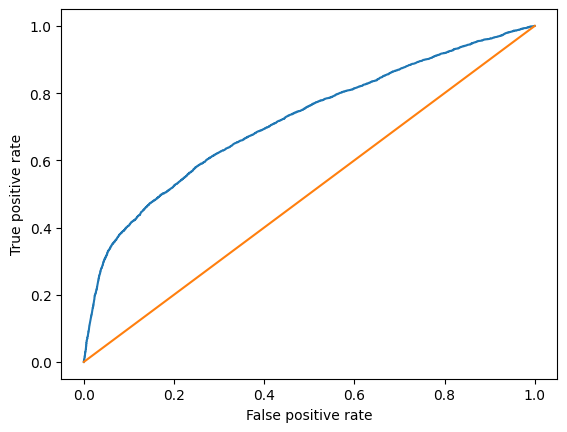

In [27]:
# plot roc curve 
fpr, tpr, thresholds = roc_curve(train.y_numeric, train_probs)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()


In [28]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(train.y_numeric, train_probs)
print(auc_score)

0.7165309444096172


## 15) Net-profit
Suppose that the model developed in (13) is used to predict the clients in *test1.csv* and *test2.csv* who will respond positively to the campaign. Only those clients who are predicted to respond positively are called during the marketing campaign. Assume that:

1. A profit of \\$100 is associated with a client who responds positively to the campaign,

2. A loss of \\$10 is associated with a client who responds negatively to the campaign

What is the net profit from the campaign? Use the confusion matrices printed in (13).

*(4 points)*

In [29]:
tn1, fp1, fn1, tp1 = cm_test1.ravel()
tn2, fp2, fn2, tp2 = cm_test2.ravel()

net_profit_test1 = 100*tp1 - 10*fp1
net_profit_test2 = 100*tp2 - 10*fp2

print(net_profit_test1, net_profit_test2)

22260 22300


## 16) Decision threshold probability
Based on the profit and loss associated with client responses specified in (15), and the model developed in (13), find the decision threshold probability of classification, such that the net profit is maximized. Use *train.csv*

Proceed as follows:

1. You would have obtained FPR and TPR for all potential decision threshold probabilities in (14). 

2. Formulate an expression quantifying the net profit per client, in terms of FPR, TPR, and the overall response rate, i.e., proportion of people actually subscribing to the term deposit.

3. Find the decision threshold probability that maximizes the expression in (2).

*(5 points)*

In [30]:
yes_response_rate = train.y_numeric.mean()
# array of net profits at different thresholds
net_profit_per_client = (100 * tpr - 10 * fpr) * (tpr * yes_response_rate + fpr * (1 - yes_response_rate))
idxmax = np.argmax(net_profit_per_client)
optimal_threshold = thresholds[idxmax]
print(optimal_threshold)


0.035062911072210025


## 17) Net profit based on new decision threshold probability
Using the new decision threshold probability obtained in (16), answer (15), i.e., what is the net-profit associated with the clients in *test1.csv* and *test2.csv* if a marketing campaign is performed. Again, only those clients who are predicted to respond positively, based on the new decision threshold probability, are called during the marketing campaign

Also, print the confusion matrices for predictions on *test1.csv* and *test2.csv* with the new threshold probability.

*(4 points)*

In [31]:
threshold = optimal_threshold
pred_labels_train_optimal = (train_probs > threshold).astype(int)
pred_labels_test1_optimal = (test1_probs > threshold).astype(int)
pred_labels_test2_optimal = (test2_probs > threshold).astype(int)

cm_train_optimal = confusion_matrix(train.y_numeric, pred_labels_train_optimal)
cm_test1_optimal = confusion_matrix(test1.y_numeric, pred_labels_test1_optimal)
cm_test2_optimal = confusion_matrix(test2.y_numeric, pred_labels_test2_optimal)

tn_optimal1, fp_optimal1, fn_optimal1, tp_optimal1 = cm_test1_optimal.ravel()
tn_optimal2, fp_optimal2, fn_optimal2, tp_optimal2 = cm_test2_optimal.ravel()

tpr_optimal1 = tp_optimal1/(tp_optimal1 + fn_optimal1)
fpr_optimal1 = fp_optimal1/(fp_optimal1 + tn_optimal1)

tpr_optimal2 = tp_optimal2/(tp_optimal2 + fn_optimal2)
fpr_optimal2 = fp_optimal2/(fp_optimal2 + tn_optimal2)

net_profit_test1_optimal = 100*tp_optimal1 - 10*fp_optimal1
net_profit_test2_optimal = 100*tp_optimal2 - 10*fp_optimal2

print(net_profit_test1_optimal, net_profit_test2_optimal)

print(cm_train_optimal)
print(cm_test1_optimal) 
print(cm_test2_optimal)

12880 13190
[[    1 30895]
 [    0  4104]]
[[  36 4472]
 [  16  576]]
[[  27 4491]
 [  12  581]]


## 18) Model preference
Was the classification accuracy of the model in (13) higher than that of the model in (17)? If yes, then should you prefer the model in (13) for the marketing campaign? Why or why not?

*Note: The model in (17) is the same as in (13), except with a different decision threshold probability*

*(3 points)*

In [32]:
print("Q13 Model Accuracies: ", accuracy_test1, accuracy_test2)

accuracy_optimal1 = (tn_optimal1 + tp_optimal1)/(tn_optimal1 + fp_optimal1 + fn_optimal1 + tp_optimal1)
accuracy_optimal2 = (tn_optimal2 + tp_optimal2)/(tn_optimal2 + fp_optimal2 + fn_optimal2 + tp_optimal2)

print("Q17 Model Accuracies: ", accuracy_optimal1, accuracy_optimal2)

Q13 Model Accuracies:  0.7874509803921569 0.7779299549990217
Q17 Model Accuracies:  0.12 0.11895910780669144


The classification accuracy of the model in (13) is higher than that of the model in (17). Although the model created in Q17 leads to a higher net profit for client, because its accuracy is so low, the total net profit is lower since it creates so many false positives.

## 19) ROC curve
Plot the ROC curve for the model developed in (13). Mark the point on the curve corresponding to the decision threshold probability identified in (16).

*Note that the ROC curve is independent of the decision threshold probability used by the model for prediction*

*(3 points)*

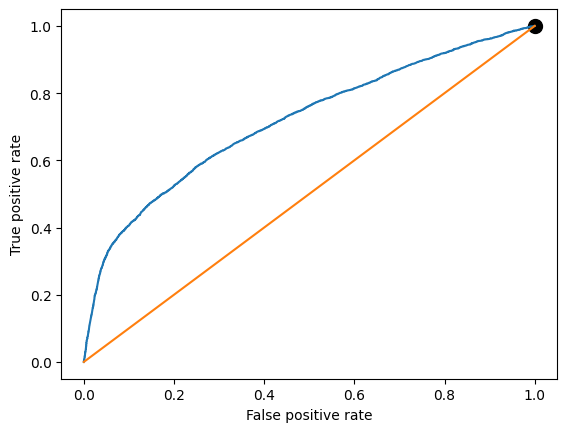

In [33]:
# plot roc curve
fpr, tpr, thresholds = roc_curve(train.y_numeric, train_probs)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

fpr_optimal = fpr[idxmax]
tpr_optimal = tpr[idxmax]
plt.scatter(fpr_optimal, tpr_optimal, color='black', marker='o', s=100, label=f"Optimal Threshold ({optimal_threshold:.2f})")

plt.show()


## 20) Profit with TPR / FPR

Make a scatterplot of TPR vs FPR, and color the points based on net profit per client.

You can use the following code to make the plot if you have the relevant metrics in `tpr`, `fpr`, and `net_profit`

*(1 point)*

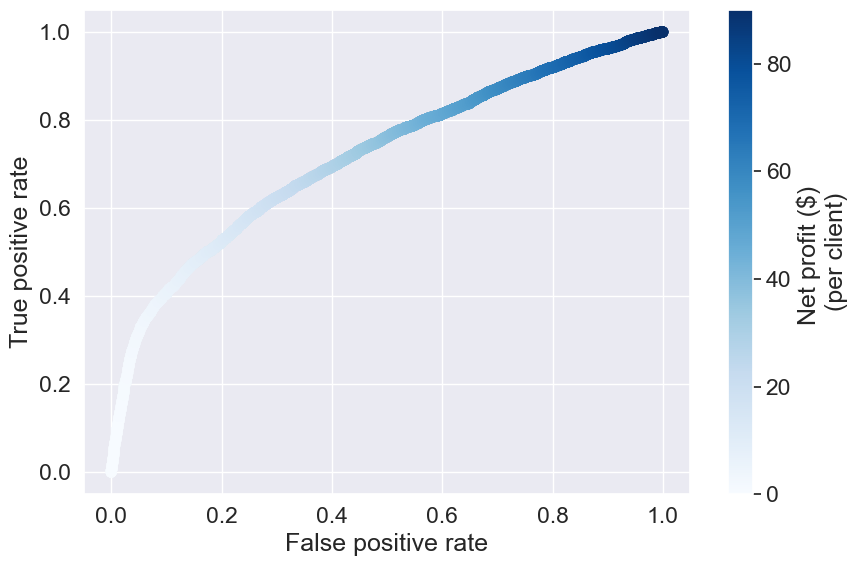

In [34]:
#| eval: false
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["figure.autolayout"] = True
f, ax = plt.subplots()
points = ax.scatter(fpr, tpr, c = net_profit_per_client, s=50, cmap="Blues")
f.colorbar(points, label = "Net profit ($) \n(per client)")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

## 21) Precision-recall
Compare the precision and recall of the models in (13) and (17) on *train.csv*.

*Note: The model in (17) is the same as in (13), except with a different decision threshold probability*

*(4 points)*

In [35]:
precision_13 = precision_score(train.y_numeric, pred_labels_train)
recall_13 = recall_score(train.y_numeric, pred_labels_train)

precision_17 = precision_score(train.y_numeric, pred_labels_train_optimal)
recall_17 = recall_score(train.y_numeric, pred_labels_train_optimal)

print(precision_13, recall_13)
print(precision_17, recall_17)

0.2628372497824195 0.5151072124756335
0.11726049315694734 1.0


## 22) Precision-recall: important metric
Based on the above comparison, which metric among precision and recall turns out to be more important for maximizing the net profit in the marketing campaign?

*(1 point)*

Precision is more important in maximizing net profits because the large number of false positives resulting from a low precision are incredibly costly and weight down the net profit.

## 23) Precision-recall curve
Plot the precision-recall curve vs decision threshold probability for the model developed in (13). Mark the points on the curve corresponding to the decision threshold probability identified in (16).

*(3 points)*

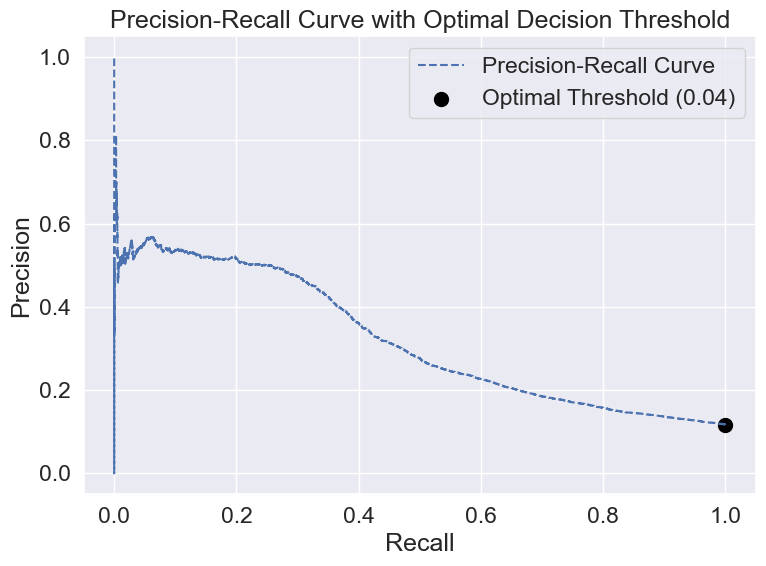

In [ ]:
from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(train.y_numeric, train_probs)

thresholds = np.append(thresholds, 1.0) 

optimal_idx = np.argmin(np.abs(thresholds - optimal_threshold))  
optimal_precision = precision[optimal_idx]
optimal_recall = recall[optimal_idx]

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve", linestyle="--")
plt.scatter(optimal_recall, optimal_precision, color="black", marker='o', s=100,
            label=f"Optimal Threshold ({optimal_threshold:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with Optimal Decision Threshold")
plt.legend()
plt.show()





## 24) Precision-recall vs FPR-TPR

Instead of using the FPR and TPR metrics to find the optimum decision threshold probability in (16), use the precision-recall metrics to find the same.

*(5 points)*

In [ ]:
prob_yes = train.y_numeric.mean()
precision, recall, thresholds = precision_recall_curve(train.y_numeric, train_probs)
net_profit = (prob_yes * recall * 100) - ((1 - prob_yes) * (1 - precision) * 10)
idxmax = np.argmax(net_profit)
optimal_thresh = thresholds[idxmax]
print(optimal_thresh)

0.03628745570706167


## 25) Sklearn

Using train.csv and **only sklearn, pandas, and numpy**, train a Logistic Regression model. You need the following steps:

- The response is still y.
- Predictors are education, month, day and age.
- Numerical predictors need to be transformed to **all** their second-order polynomial versions.  
- Logistic regression benefits from feature scaling, especially when using polynomial features, as it helps the optimization algorithm converge faster. Use StandardScaler or MinMaxScaler to scale the features.
- Categorical predictors need to be one-hot-encoded. They should not interact with the numerical predictors.

Print the accuracy and recall for both training and test data using a threshold of 0.11. Use **test1.csv** as the test dataset. **Remember that the test dataset needs to go through the exact same transformation as the training dataset.** 

**Hints**:

* Do not scale categorical features: One-hot encoded dummy variables are already on the same scale (0 or 1). Scaling them is unnecessary and may distort their meaning.
* Scale numerical features: This includes both original numerical features and any polynomial features generated from them.
* Use a structured approach: A production-ready way to handle these transformations is by using ColumnTransformer within a Pipeline, ensuring that preprocessing steps are applied consistently. However, using a pipeline is optional.

*(8 points)*

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

categorical_vars = ["education", "month", "day"]
num_features = ["age"]

y_train = train["y_numeric"]
y_test1 = test1["y_numeric"]

num_trans = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),  
    ("scaler", StandardScaler())  
])

cat_trans = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", num_trans, num_features),
        ("categorical", cat_trans, categorical_vars)
    ]
)

model_skl = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

x_train = train[categorical_vars + num_features]
x_test = test1[categorical_vars + num_features]
model_skl.fit(x_train, y_train)

y_predprobs_train = model_skl.predict_proba(x_train)
y_predprobs_test1 = model_skl.predict_proba(x_test)

threshold = 0.11
y_pred_train = (y_predprobs_train[:, 1] > threshold).astype(int)
y_pred_test1 = (y_predprobs_test1[:, 1] > threshold).astype(int)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)

recall_train = recall_score(y_train, y_pred_train)
recall_test1 = recall_score(y_test1, y_pred_test1)

print("Recall:", recall_train, recall_test1)
print("Accuracies:",accuracy_train, accuracy_test1)

Recall: 0.6133040935672515 0.6199324324324325
Accuracies: 0.6780857142857143 0.6756862745098039
